In [1]:
from pathlib import Path
p = Path('.', 'data/')
print(p.resolve())

/Users/steveodom/Projects/trading/micro-instance/data


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from correlations.config import TICKERS
from correlationsfinder.Query import Query
import os

dir_path = os.getcwd()
#print(dir_path)

name = "5_periods"
length = "25"
highs = {}

def get_highest_avg_corr(base_ticker):
    highs = Query(base_ticker, 'data/correlations').ticker_highest_corr(name, length)
    if highs is not None:
        tickers = highs.target_ticker.unique()
        comparison = Query(base_ticker, 'data/correlations').tickers_comparison(tickers, name, length)
        correlation_means = comparison.mean().sort_values(ascending=False)
        return correlation_means.index[0], correlation_means[0]
    else:
        return 0,0
    

for ticker in TICKERS:
    k,v = get_highest_avg_corr(ticker)
    highs[ticker] = {'ticker': k, 'avg_correlation': v}
df = pd.DataFrame(highs).transpose()
#df

In [3]:
sorted = df.sort_values(by=['avg_correlation'], ascending=False)
base_ticker = sorted.index[0]
high_value = sorted.iloc[0].avg_correlation
target_ticker = sorted.iloc[0].ticker
print(base_ticker, target_ticker)
sorted


FB GM


avg_correlation ticker
FB           0.543067     GM
SBUX         0.512973    BBY
PPL           0.48452     KO
CTSH          0.46604    LOW
SYMC         0.459827     GM
MAR          0.448227    HPE
PFE          0.445147    JCI
UNP           0.44428    EMR
GIS          0.441787     PM
PM             0.4392    UNH
CMCSA        0.435253    DVN
MCD          0.434027     BK
WFC          0.433307    MDT
SYY          0.430893    WDC
DAL           0.42912   EBAY
SLB          0.428413    POT
ABT          0.424213     GM
EMR          0.423333    SYY
ESRX         0.422693    OXY
AMZN         0.422467    BBT
WDC          0.420893     PG
XOM          0.420133     SO
BA            0.41848      T
AIG           0.41816    APA
APC           0.41732    WDC
AGN          0.408707    ABX
TXN          0.408587    HPQ
AAPL         0.408453    SYF
HPE          0.405267     PG
MPC          0.405093   AMTD
...               ...    ...
ATVI          0.27984     PM
GILD         0.277267    WDC
FCAU         0.277227    FOX
DB           0.276773    COP
POT          0.276227     GM
OXY          0.275813    CCL
MYL          0.274053    NEM
UAL          0.273973    APC
KEY           0.27228    DVN
VLO          0.271773   TSLA
BBT          0.270187    LYB
T             0.26692    CFG
PNC          0.264507     PG
COP           0.26104    EMR
CFG          0.260427      T
GE           0.258293    CTL
MET          0.257107    SLB
INTC          0.25648    FDC
SYF          0.253027    PPL
TSLA         0.250387   MDLZ
GLW           0.24912    TGT
HON          0.240653     BK
EXC           0.22384    OXY
SIRI         0.189173    PPL
IP           0.170707    APA
LVLT                0      0
WFD                 0      0
RAI                 0      0
DOW                 0      0
BHI                 0      0

[157 rows x 2 columns]

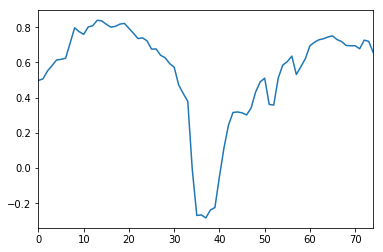

In [4]:
history = Query(base_ticker, 'data/correlations').ticker_history(target_ticker, name, length)
history.plot()
plt.show()

fetching... ZTS
200 status_code
success
fetching... ABX
200 status_code
success
[-0.37200000000000005, -0.304, -0.162, -0.113, -0.066, -0.073, -0.055, -0.042, -0.018000000000000002, 0.015, -0.039, -0.08, -0.14400000000000002, 0.244, 0.385, 0.43200000000000005, 0.451, 0.48200000000000004, 0.537, 0.564, 0.5720000000000001, 0.588, 0.698, 0.6409999999999999, 0.5710000000000001, 0.605, 0.583, 0.578, 0.46799999999999997, 0.174, 0.18100000000000002, 0.254, 0.243, 0.26, 0.222, 0.21100000000000002, 0.201, 0.157, 0.12, 0.11199999999999999, 0.107, 0.1, 0.1, 0.163, 0.212, 0.256, 0.24100000000000002, 0.242, 0.21100000000000002, 0.242, 0.594, 0.7559999999999999, 0.745, 0.721, 0.679, 0.602, 0.302, 0.285, 0.272, 0.257, 0.253, 0.14300000000000002, -0.07400000000000001, 0.105, 0.019, -0.032, -0.036000000000000004, -0.015, -0.083, -0.177, -0.142, -0.11599999999999999, -0.124, -0.132, -0.14800000000000002] --> 75


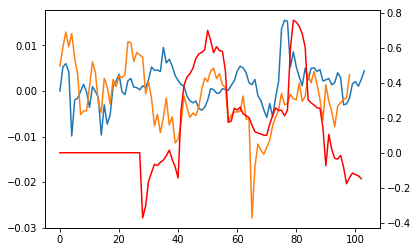

In [5]:
from quotes.Dataframe import Dataframe
def get_quote(ticker):
    return Dataframe('daily', ticker).build()

def get_filled_history(base_ticker, target_ticker,directory="data/correlations"):
    history = Query(base_ticker, directory).ticker_history(target_ticker, name, length)
    # TODO: confirm why I should make this 30 to line them up properly
    # is it the window length of 25 plus 5 offset?
    print(history.tolist(), '-->', len(history))
    fill = [0] * 28
    return fill + history.tolist()
    
def plot_2_quotes(base_ticker, target_ticker, directory="data/correlations"):
    quote_base_ticker = get_quote(base_ticker)
    quote_target_ticker = get_quote(target_ticker)
    combined = {'base': quote_base_ticker['ewm'].values, 'target': quote_target_ticker['ewm'].shift(-5).values}
    df = pd.DataFrame(data=combined)

    fig, ax1 = plt.subplots()
    ax1.plot(df)

    correlations = get_filled_history(base_ticker, target_ticker, directory)
    
    ax2 = ax1.twinx()
    ax2.plot(correlations, 'r')
    plt.show()

plot_2_quotes('ZTS', 'ABX', "data/correlations")

fetching... COP
200 status_code
success
fetching... EMR
200 status_code
success
[0.11599999999999999, 0.131, 0.08800000000000001, 0.10300000000000001, 0.132, 0.065, 0.187, 0.28, 0.289, 0.348, 0.34299999999999997, 0.434, 0.409, 0.36700000000000005, 0.32899999999999996, 0.28300000000000003, 0.215, 0.146, 0.14300000000000002, 0.18899999999999997, 0.293, 0.155, -0.243, -0.27, -0.35100000000000003, 0.3, 0.591, 0.6829999999999999, 0.728, 0.745, 0.725, 0.782, 0.7859999999999999, 0.7959999999999999, 0.7879999999999999, 0.465, 0.187, 0.179, 0.21, 0.244, 0.253, 0.247, 0.24, 0.22899999999999998, 0.209, 0.193, 0.115, 0.016, -0.122, -0.33, -0.49, -0.5529999999999999, -0.529, -0.304, -0.271, -0.257, -0.071, 0.409, 0.588, 0.614, 0.628, 0.638, 0.47200000000000003, 0.47100000000000003, 0.462, 0.45, 0.445, 0.435, 0.426, 0.395, 0.34700000000000003, 0.359, 0.41700000000000004, 0.519, 0.5379999999999999] --> 75


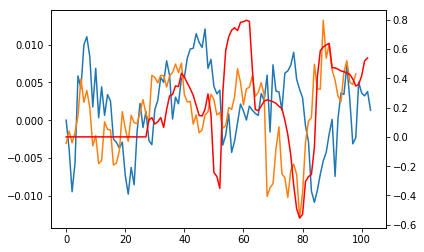

In [6]:
plot_2_quotes('COP', 'EMR')


fetching... FB
200 status_code
success
fetching... MSFT
200 status_code
success
[0.136, 0.138, 0.20199999999999999, 0.254, 0.303, 0.23600000000000002, 0.34299999999999997, 0.425, 0.546, 0.531, 0.499, 0.46799999999999997, 0.493, 0.392, 0.307, 0.262, 0.28600000000000003, 0.289, 0.27699999999999997, 0.265, 0.179, 0.07, 0.032, -0.018000000000000002, -0.059000000000000004, -0.126, -0.01, -0.26, -0.253, -0.18899999999999997, -0.147, -0.026000000000000002, 0.017, 0.011000000000000001, 0.032, 0.10800000000000001, 0.217, 0.21600000000000003, 0.19, 0.18100000000000002, 0.177, 0.073, -0.1, -0.151, -0.159, -0.156, -0.102, -0.13699999999999998, -0.136, -0.105, -0.08, -0.124, -0.147, -0.10400000000000001, -0.10800000000000001, -0.111, -0.214, -0.371, -0.474, -0.532, -0.5539999999999999, -0.564, -0.574, -0.601, -0.63, -0.654, -0.682, -0.7090000000000001, -0.821, -0.821, -0.8190000000000001, -0.81, -0.857, -0.857, -0.8759999999999999] --> 75


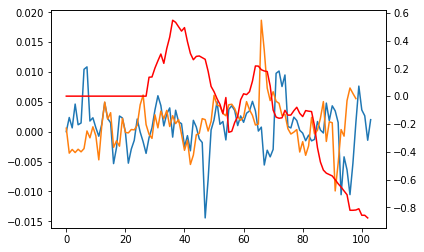

In [7]:
plot_2_quotes('FB', 'MSFT')

fetching... AAPL
200 status_code
success
fetching... MSFT
200 status_code
success
[-0.127, -0.129, -0.046, 0.006, 0.077, 0.159, -0.215, -0.24100000000000002, -0.226, -0.265, -0.3, -0.276, -0.26899999999999996, -0.311, -0.33299999999999996, -0.381, -0.40700000000000003, -0.41700000000000004, -0.449, -0.446, -0.40399999999999997, -0.319, -0.349, -0.45799999999999996, -0.545, -0.664, -0.7440000000000001, -0.785, -0.621, -0.505, -0.392, -0.196, -0.19899999999999998, -0.22, -0.223, -0.19899999999999998, -0.163, -0.16399999999999998, -0.16699999999999998, -0.142, -0.129, 0.033, 0.134, 0.11599999999999999, 0.10300000000000001, 0.134, 0.177, 0.184, 0.203, 0.21100000000000002, 0.218, 0.218, 0.193, 0.23, 0.24100000000000002, 0.22, 0.14800000000000002, 0.14400000000000002, 0.221, 0.29, 0.266, 0.281, 0.128, -0.233, -0.23199999999999998, -0.262, -0.299, -0.35200000000000004, -0.33899999999999997, -0.365, -0.381, -0.381, -0.307, -0.321, -0.373] --> 75


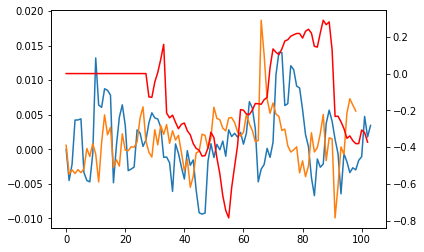

In [8]:
plot_2_quotes('AAPL', 'MSFT', "data/correlations")

fetching... AAPL
200 status_code
success
fetching... MSFT
200 status_code
success
[-0.127, -0.129, -0.046, 0.006, 0.077, 0.159, -0.215, -0.24100000000000002, -0.226, -0.265, -0.3, -0.276, -0.26899999999999996, -0.311, -0.33299999999999996, -0.381, -0.40700000000000003, -0.41700000000000004, -0.449, -0.446, -0.40399999999999997, -0.319, -0.349, -0.45799999999999996, -0.545, -0.664, -0.7440000000000001, -0.785, -0.621, -0.505, -0.392, -0.196, -0.19899999999999998, -0.22, -0.223, -0.19899999999999998, -0.163, -0.16399999999999998, -0.16699999999999998, -0.142, -0.129, 0.033, 0.134, 0.11599999999999999, 0.10300000000000001, 0.134, 0.177, 0.184, 0.203, 0.21100000000000002, 0.218, 0.218, 0.193, 0.23, 0.24100000000000002, 0.22, 0.14800000000000002, 0.14400000000000002, 0.221, 0.29, 0.266, 0.281, 0.128, -0.233, -0.23199999999999998, -0.262, -0.299, -0.35200000000000004, -0.33899999999999997, -0.365, -0.381, -0.381, -0.307, -0.321, -0.373] --> 75


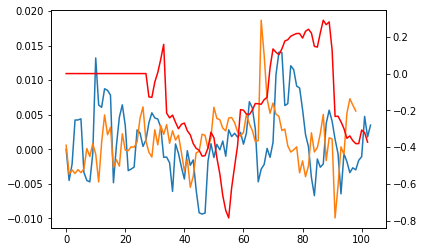

In [9]:
plot_2_quotes('AAPL', 'MSFT', "data/correlations")

## Anamoly Investigation
The below are samples from two consecutive days 11/24/2017 and 11/27/2017. 
f1,f2 == log returns ending 11/24
g1,g2 == log returns ending 11/27

The rvalue drops dramatically between the two days.

Why?

Do we get the same rvalue here?


In [10]:
from scipy.stats import linregress
#sample 1
#LinregressResult(slope=-1.8585004486796577, intercept=-0.00082904212863938072, rvalue=-0.82548615925712832, pvalue=4.0869216448602534e-06, stderr=0.29152800755363645) -------------> 
UNP1 = [0.054701825343973276, 0.0052237327091253505, -0.006082691703699794, -0.004996564495804101, 0.010395729173574786, 0.011810324625788127, -0.010273045306901984, 0.0012792633188896119, -0.0024747207236632818, 0.006472514505617255, -0.006216224725904773, -0.0031655071990712713, -0.0018869548441342587, -0.0021485977927593325, -0.004570352455985471, 0.007491316732109787, -0.008096512790870314, 0.0032809561464448578, 0.009522655925685797, 0.006298429196766264, 0.0033035479622753883]
UNP2 =                       [0.0052237327091253505, -0.006082691703699794, -0.004996564495804101, 0.010395729173574786, 0.011810324625788127, -0.010273045306901984, 0.0012792633188896119, -0.0024747207236632818, 0.006472514505617255, -0.006216224725904773, -0.0031655071990712713, -0.0018869548441342587, -0.0021485977927593325, -0.004570352455985471, 0.007491316732109787, -0.008096512790870314, 0.0032809561464448578, 0.009522655925685797,0.006298429196766264, 0.0033035479622753883, -0.009260505412510334]
UAL1 = [-0.12868947868257674, 0.002005348265611495, -0.013445580709350757, 0.013612511683780859, 0.0001669031131310561, 0.0005005422645592006, 0.004991690897240275, -0.02028739207854713,-0.009530364850693473, 0.002732242136872287, -0.0063296764234124225, 0.023406767388942207, 0.004516190665039055, -0.020400269132870186, 0.0035705215183350347, -0.009035949298983326, 0.0022239338564773448, -0.012206805057538794, -0.010607872708632726, 0.0050571212494476825, 0.02048793363958179]
UAL2 =                       [0.002005348265611495, -0.013445580709350757, 0.013612511683780859, 0.0001669031131310561, 0.0005005422645592006, 0.004991690897240275, -0.02028739207854713, -0.009530364850693473, 0.002732242136872287, -0.0063296764234124225, 0.023406767388942207, 0.004516190665039055, -0.020400269132870186, 0.0035705215183350347, -0.009035949298983326, 0.0022239338564773448, -0.012206805057538794, -0.010607872708632726, 0.0050571212494476825, 0.02048793363958179, -0.00821359853738901]
# next period
#LinregressResult(slope=-0.068417855856598417, intercept=-0.0012562700960455921, rvalue=-0.039596396366879845, pvalue=0.86468871954803883, stderr=0.39609218109492977) -------------> 
d1 = linregress(UNP1, UAL1)
print(d1)

d2 = linregress(UNP2,UAL2)
print(d2)


# another day 11/06
#linreg = 0.407
COP1 = [-0.0028, -0.0003, 0.0021, 0.0012, 0.0, 0.0019, 0.0013, 0.0009, 0.0006, 0.0035, 0.0026, 0.006, -0.0016, 0.0073, 0.0038, 0.0037, 0.0013, 0.0062, 0.0065, 0.0073, 0.009]
EMR1 = [0.0007, 0.0011, 0.0034, 0.0027, 0.0007, 0.001, -0.0011, -0.0007, 0.0017, 0.0014, 0.0031, 0.0068, 0.005, 0.002, 0.0042, 0.0044, 0.0059,0.0032, 0.0037, 0.005, 0.0034]

# linreg = 0.06
COP2 = [-0.0003, 0.0021, 0.0012, 0.0, 0.0019, 0.0013, 0.0009, 0.0006, 0.0035, 0.0026, 0.006, -0.0016, 0.0073, 0.0038, 0.0037, 0.0013, 0.0062, 0.0065, 0.0073, 0.009, 0.0054]
EMR2 = [0.0011, 0.0034, 0.0027, 0.0007, 0.001, -0.0011, -0.0007, 0.0017, 0.0014, 0.0031, 0.0068, 0.005, 0.002, 0.0042, 0.0044, 0.0059, 0.0032,0.0037, 0.005, 0.0034, -0.0101]

d1 = linregress(COP1, EMR1)
print(d1)

d2 = linregress(COP2, EMR2)
print(d2)

LinregressResult(slope=-1.8585004486796577, intercept=-0.00082904212863938072, rvalue=-0.82548615925712832, pvalue=4.0869216448602534e-06, stderr=0.29152800755363645)
LinregressResult(slope=-0.068417855856598417, intercept=-0.0012562700960455921, rvalue=-0.039596396366879845, pvalue=0.86468871954803883, stderr=0.39609218109492977)
LinregressResult(slope=0.26916572583883258, intercept=0.001967403504130983, rvalue=0.40799163586167525, pvalue=0.066357287038821142, stderr=0.13818333078846137)
LinregressResult(slope=0.08422369096721824, intercept=0.0019530396395501005, rvalue=0.070963870633394335, pvalue=0.75985597831933016, stderr=0.27159632276550894)


Ok, the numbers check out. It's the same as we calculate.

Do the logreturns of the one day on either end make that big of difference?

On the first day (f), there's 0.05 for f1, and -0.1286 at the front. A pretty big difference.

On the second day (g), there's -0.009 for g1 being added, and -0.0082 for g2 being added.

So big gap on the first day being different. That big difference dropping off on the second day, replaced by a nearly similar result.

Why does that make the correlation get closer to 0. It's -0.8254 the first day, with the big gap on the first day. That big gap is really bringing the r closer to -1. Removing it and replacing it with a much higher correlated day, brings r way down as we'd expect.

## Should we dampen outliers then?
Let's try it. 

In [11]:
quote = get_quote("FB")



fetching... FB
200 status_code
success


In [12]:
quote['ewm'] = quote['log_ret'].ewm(span=2).mean()
quote.head()

close        date    open   log_ret       C/O  log_zscore  \
2017-07-19  164.14  2017-07-19  163.59  0.000000  1.003362         0.0   
2017-07-20  164.53  2017-07-20  164.80  0.002373  0.998362         0.0   
2017-07-21  164.43  2017-07-21  164.16 -0.000608  1.001645         0.0   
2017-07-24  166.00  2017-07-24  164.64  0.009503  1.008260         0.0   
2017-07-25  165.28  2017-07-25  165.01 -0.004347  1.001636         0.0   

                 ewm    slope  
2017-07-19  0.000000  0.00000  
2017-07-20  0.001780  0.00000  
2017-07-21  0.000127  0.00000  
2017-07-24  0.006456  0.00000  
2017-07-25 -0.000776  1.63976

fetching... UNP
200 status_code
success
fetching... UAL
200 status_code
success
[0.085, 0.084, 0.41100000000000003, 0.369, 0.33799999999999997, 0.226, 0.19899999999999998, 0.174, 0.10400000000000001, 0.092, 0.08800000000000001, 0.076, 0.129, 0.10300000000000001, 0.053, 0.002, 0.039, 0.057, 0.018000000000000002, 0.002, 0.006, 0.012, 0.002, 0.003, 0.006, 0.005, 0.001, 0.038, 0.066, 0.157, 0.221, 0.271, 0.268, 0.36700000000000005, 0.391, 0.39899999999999997, 0.374, 0.27399999999999997, 0.35200000000000004, 0.425, 0.606, 0.677, 0.642, 0.5660000000000001, 0.469, 0.6970000000000001, 0.769, 0.774, 0.772, 0.777, 0.758, 0.7559999999999999, 0.7509999999999999, 0.7390000000000001, 0.722, 0.706, 0.7240000000000001, 0.713, 0.6890000000000001, 0.626, 0.584, 0.586, 0.6709999999999999, 0.721, 0.733, 0.626, 0.45899999999999996, 0.156, 0.039, 0.156, 0.222, 0.218, 0.24100000000000002, 0.207, 0.161] --> 75


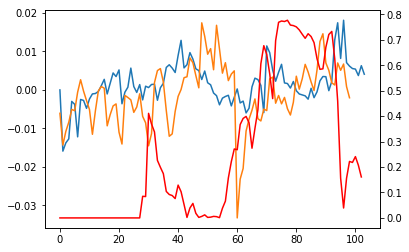

In [13]:
plot_2_quotes('UNP', 'UAL', "data/correlationstmp")

## Let's test our log correlation results

In [14]:
import numpy as np

def count_matches(base_ticker, target_ticker, offset=5, print_df = False):
    z = get_quote(base_ticker)
    a = get_quote(target_ticker)

    # get difference from offset days ago    
    z['delta'] = np.log(z.close) - np.log(z.close.shift(offset))
    z['delta'].fillna(0, inplace=True)
    z['date'] = z.index

    z.loc[:,'direction'] = z.apply(lambda row: 1 if row['delta'] > 0 else -1, axis=1)

    a['delta'] = np.log(a.close) - np.log(a.close.shift(offset))
    a['delta'].fillna(0, inplace=True)
    a['date'] = z.index

    a.loc[:,'direction'] = a.apply(lambda row: 1 if row['delta'] > 0 else -1, axis=1)
    
    mx = min(len(z), len(z))
    print(mx)
    zt = z.iloc[-mx:,:]
    at = a.iloc[-mx:,:]

    combined = {'date_z': zt['date'], 'base': zt['direction'].values, 'date_a': at['date'].shift(offset),'target': at['direction'].shift(offset).values}
    df = pd.DataFrame(data=combined)
    df.loc[:,'match'] = df.apply(lambda row: 1 if row['base'] == row['target'] else 0, axis=1)
    #print(df['match'].sum())
    #print(len(df))
    if print_df:
        print(df)
    
    return df['match'].sum() / len(df) * 100, df['match'].sum(), len(df)




In [21]:
# highest correlation COP EMR
pct, count, total = count_matches('COP', 'EMR', 5)
pct, count, total

fetching... COP
200 status_code
success
fetching... EMR
200 status_code
success
104


(67.3076923076923, 70, 104)

In [16]:
# much lower correlation comparison
pct, count, total = count_matches('MO', 'ORCL', 2)
pct, count, total


fetching... MO
200 status_code
success
fetching... ORCL
200 status_code
success
104


(49.03846153846153, 51, 104)

In [20]:
pct, count, total = count_matches('FB', 'GM', 5)
pct, count, total


fetching... FB
200 status_code
success
fetching... GM
200 status_code
success
104


(50.0, 52, 104)

In [18]:
# Compare if all 1's for target ticker
ary = np.ones((len(a)), dtype=np.int)
#ary
combined = {'date_z': z['date'], 'base': z['direction'].values, 'date_a': a['date'].shift(5),'target': ary}
df = pd.DataFrame(data=combined)
df.loc[:,'match'] = df.apply(lambda row: 1 if row['base'] == row['target'] else 0, axis=1)
print(df['match'].sum())
print(len(df))

print(df['match'].sum() / len(df) * 100)
df

NameError: name 'a' is not defined

In [ ]:
quote = get_quote("FB")
quote

In [ ]:
from datetime import datetime
from scipy.stats import linregress
import numpy as np

window_length = 5
x = quote['close'][-1*window_length * 2:-1*window_length]
r = linregress(x, np.arange(window_length))
r

In [ ]:
quote.head()
quote.loc['2017-07-19']

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import linregress
window_length = 5
def calcSlope(quote, row, col):
        rid = row.date
        id = quote.index.get_loc(quote.loc[rid]['date']) + 1
        if id >= window_length:
            frame = quote.iloc[id-window_length:id,:]

            slope = linregress(frame['close'], np.arange(window_length)).slope
            print(frame[['close', 'date']], slope, rid, id)
            return slope
        else:
            return 0
        

quote.loc[:,'slope'] = quote.apply(lambda row: calcSlope(quote, row, 'close'), axis=1)
quote

In [ ]:
quote.iloc[-5:,:]['date']